#Importing the Liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#Loading the Dataset

In [2]:
data = pd.read_csv('/content/Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#Data Processing & Cleaning

In [3]:
df = data.copy()
df.drop(columns=['CustomerId','RowNumber','Surname'], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#Checking for null values

In [4]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#LABEL ENCODING

In [5]:
# label encoding of coulumns
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


#Checking class imbalances

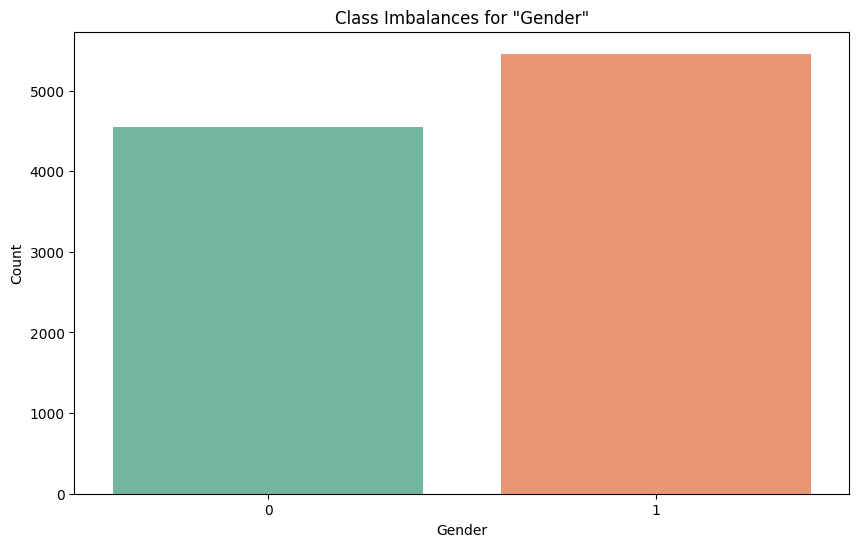

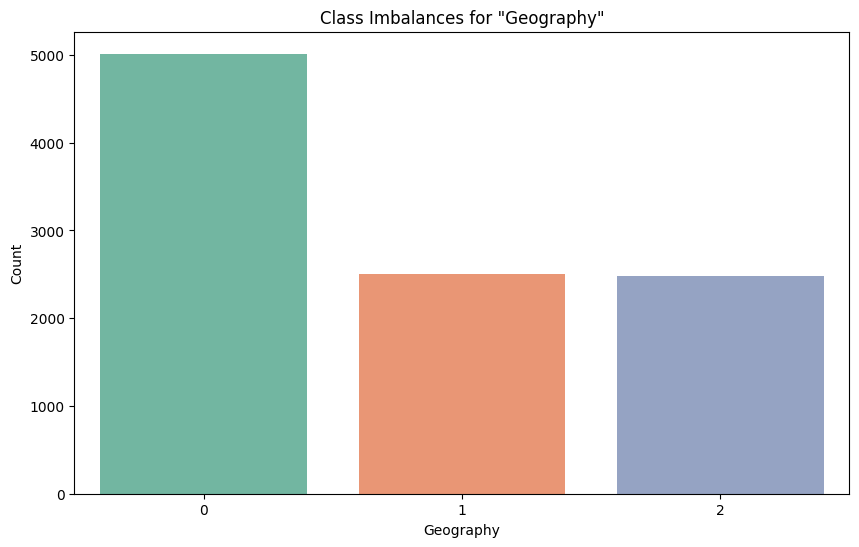

In [7]:
# for Checking class imbalances by plots

sns.countplot(x='Exited', data=df)
plt.show()


#DATA VISUALIZATION

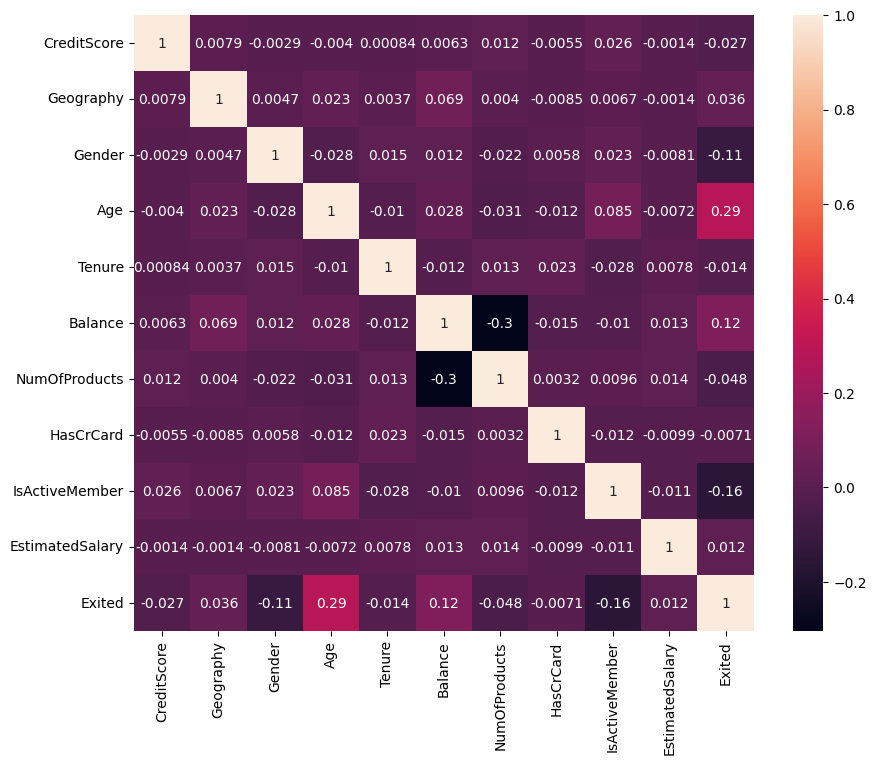

In [10]:
#  heatmap

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()


#Train Test Split

In [11]:
# Train Test Split

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Exited']).values, df.Exited.values, test_size=0.2, random_state=42)

In [12]:
# checking the lengths

print("Length of xtest:", len(x_test))
print("Length of ytest:", len(y_test))
print("Length of xtrain:", len(x_train))
print("Length of y train:",len(y_train))


Length of xtest: 2000
Length of ytest: 2000
Length of xtrain: 8000
Length of y train: 8000


#Finding Best Classifier

In [13]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
logistic_regression_classifier = LogisticRegression(random_state=42)
logistic_regression_classifier.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [14]:
# Train the Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

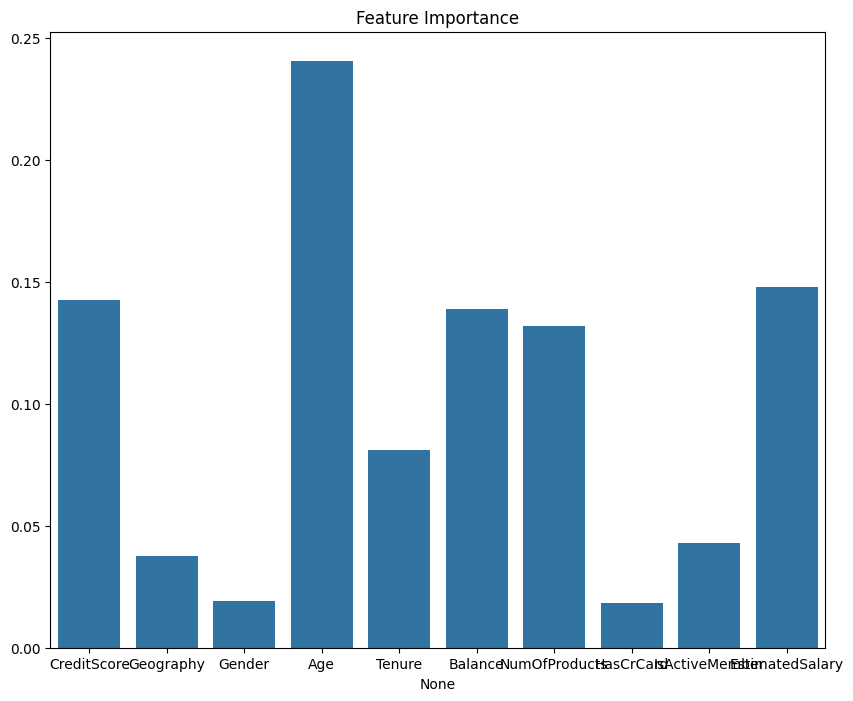

In [24]:

# Effect of different Features:

importances = rf_classifier.feature_importances_
features = df.drop(columns=['Exited']).columns

plt.figure(figsize=(10,8))
sns.barplot(x=features, y=importances)
plt.title('Feature Importance')
plt.show()


In [15]:
# Training the Gradient Boosting model

from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [19]:
# Accuracy of Logistic Regression Classifier

y_pred1 = logistic_regression_classifier.predict(x_test)
accuracy_of_logistic_regression = accuracy_score(y_test, y_pred1)
print("Logistic Regression Classifier:", accuracy_of_logistic_regression)

# Accuracy of Random Forest Classifier

y_pred2 = rf_classifier.predict(x_test)
accuracy_of_random_forest = accuracy_score(y_test, y_pred2)
print("Random Forest Classifier:", accuracy_of_random_forest)

# Accuracy of Gradient Boosting Classifier

y_pred3 = gb_classifier.predict(x_test)
accuracy_of_gradient_boosting = accuracy_score(y_test, y_pred3)
print("Gradient Boosting Classifier:", accuracy_of_gradient_boosting)

Logistic Regression Classifier: 0.8005
Random Forest Classifier: 0.8645
Gradient Boosting Classifier: 0.8655


In [20]:
# Confusion Matrix of Logistic Regression Classifier

from sklearn.metrics import confusion_matrix
logistic_regression_confusion_matrix = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix of Logistic Regression Classifier:\n", logistic_regression_confusion_matrix)

# Confusion Matrix of Random Forest Classifier

random_forest_confusion_matrix = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix of Random Forest Classifier:\n", random_forest_confusion_matrix)

# Confusion Matrix of Gradient Boosting Classifier

gradient_boosting_confusion_matrix = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix of Gradient Boosting Classifier:\n", gradient_boosting_confusion_matrix)

Confusion Matrix of Logistic Regression Classifier:
 [[1573   34]
 [ 365   28]]
Confusion Matrix of Random Forest Classifier:
 [[1546   61]
 [ 210  183]]
Confusion Matrix of Gradient Boosting Classifier:
 [[1547   60]
 [ 209  184]]


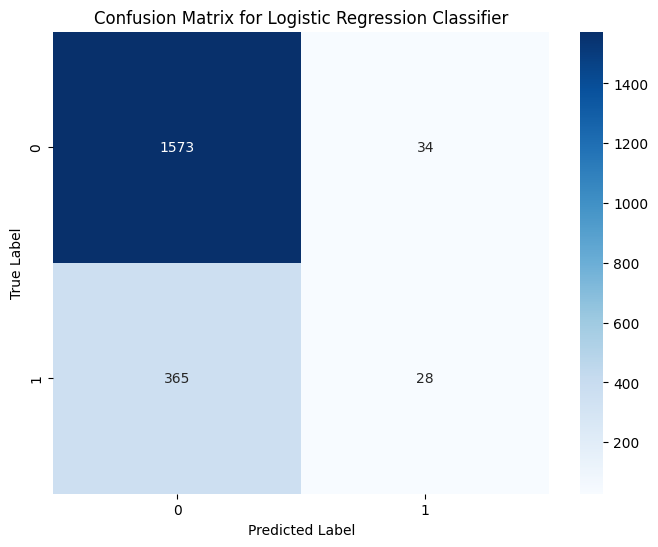

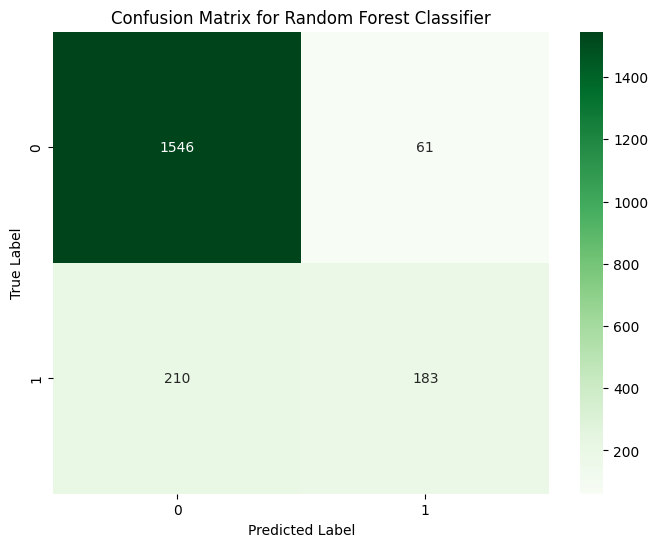

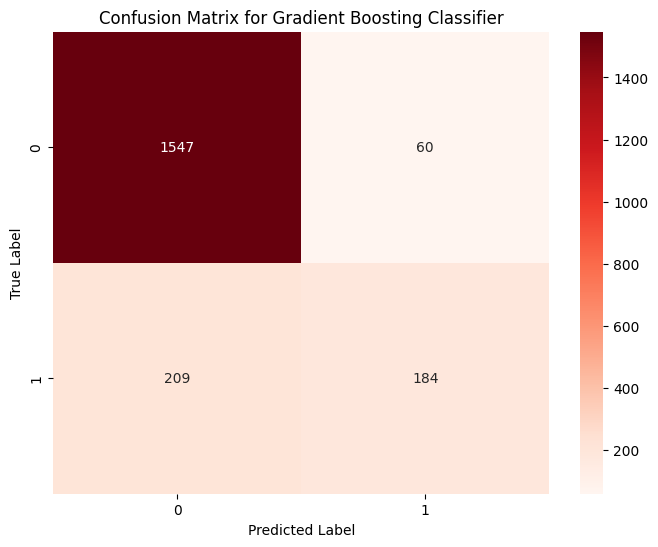

In [21]:
# Plot the confusion matrix for Logistic Regression Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(logistic_regression_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression Classifier")
plt.show()

# Plot the confusion matrix for Random Forest Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(random_forest_confusion_matrix, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

# Plot the confusion matrix for Gradient Boosting Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(gradient_boosting_confusion_matrix, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Gradient Boosting Classifier")
plt.show()

#Result

###This shows that Random Forest and Gradient Boosting Classiffiers performing best on this DataSet.